# 01 - Carga y Limpieza de Datos

**Proyecto:** EDA de Dengue en Colombia  
**Maestría en Inteligencia Artificial** - Desarrollo de Soluciones  

Este notebook carga, inspecciona y limpia los datos de dengue del SIVIGILA y las proyecciones de población del DANE.

**Fuentes de datos:**
- Dengue regular (código 210): años 2010, 2016, 2022, 2024
- Dengue grave (código 220): años 2010, 2016, 2019, 2022, 2024
- Proyecciones de población DANE (2005-2020)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# Importar utilidades del proyecto
sys.path.insert(0, os.path.join('..', 'src'))
from utils import (
    cargar_dengue, cargar_dane, configurar_estilo, resumen_dataframe,
    convertir_edad_anos, clasificar_grupo_etario,
    COLS_CLAVE, ANOS_DENGUE_REGULAR, ANOS_DENGUE_GRAVE
)

configurar_estilo()
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 100)

## 1. Carga de datos de Dengue Regular (código 210)

In [2]:
print('Cargando datos de Dengue Regular (código 210)...')
print(f'Años disponibles: {ANOS_DENGUE_REGULAR}')
print(f'Nota: No hay datos de dengue regular para 2019\n')

df_dengue = cargar_dengue(tipo='regular')
resumen_dataframe(df_dengue, 'Dengue Regular (210)')

Cargando datos de Dengue Regular (código 210)...
Años disponibles: [2010, 2016, 2022, 2024]
Nota: No hay datos de dengue regular para 2019

  Cargando Datos_2010_210.xlsx... 147,224 registros, 72 columnas
  Cargando Datos_2016_210.xlsx... 100,117 registros, 72 columnas
  Cargando Datos_2022_210.xlsx... 65,691 registros, 72 columnas
  Cargando Datos_2024_210.xlsx... 309,627 registros, 72 columnas

  Total: 622,659 registros

  Resumen: Dengue Regular (210)
  Dimensiones: 622,659 filas x 72 columnas
  Memoria: 1285.8 MB
  Columnas con nulos: 21
    - nacionalidad: 247,341 (39.7%)
    - nombre_nacionalidad: 247,341 (39.7%)
    - GRU_POB: 475,435 (76.4%)
    - nom_grupo: 553,633 (88.9%)
    - estrato: 260,485 (41.8%)
    - sem_ges: 555,344 (89.2%)
    - fuente: 247,341 (39.7%)
    - COD_PAIS_R: 247,341 (39.7%)
    - FEC_HOS: 414,419 (66.6%)
    - FEC_DEF: 622,641 (100.0%)
    - CER_DEF: 622,629 (100.0%)
    - CBMTE: 622,654 (100.0%)
    - FM_FUERZA: 619,457 (99.5%)
    - FM_UNIDAD: 619,460

In [3]:
# Primeras filas
df_dengue.head(3)

,CONSECUTIVE,COD_EVE,FEC_NOT,SEMANA,ANO,COD_PRE,COD_SUB,EDAD,UNI_MED,nacionalidad,nombre_nacionalidad,SEXO,COD_PAIS_O,COD_DPTO_O,COD_MUN_O,AREA,OCUPACION,TIP_SS,COD_ASE,PER_ETN,GRU_POB,nom_grupo,estrato,GP_DISCAPA,GP_DESPLAZ,GP_MIGRANT,GP_CARCELA,GP_GESTAN,sem_ges,GP_INDIGEN,GP_POBICFB,GP_MAD_COM,GP_DESMOVI,GP_PSIQUIA,GP_VIC_VIO,GP_OTROS,fuente,COD_PAIS_R,COD_DPTO_R,COD_MUN_R,COD_DPTO_N,COD_MUN_N,FEC_CON,INI_SIN,TIP_CAS,PAC_HOS,FEC_HOS,CON_FIN,FEC_DEF,AJUSTE,FECHA_NTO,CER_DEF,CBMTE,FEC_ARC_XL,FEC_AJU,FM_FUERZA,FM_UNIDAD,FM_GRADO,confirmados,va_sispro,Estado_final_de_caso,nom_est_f_caso,Nom_upgd,Pais_ocurrencia,Nombre_evento,Departamento_ocurrencia,Municipio_ocurrencia,Pais_residencia,Departamento_residencia,Municipio_residencia,Departamento_Notificacion,Municipio_notificacion
0,3076019,210,2010-05-27,21,2010,7689504656,1,14,1,NaN,NaN,F,170,76,895,1,9997,S,ESS024,6,5.0,NaN,NaN,2,2,2,2,2,NaN,2,2,2,2,2,2,1,NaN,NaN,76,895,76,76895,2010-05-27,2010-05-24,2,1,2010-05-27,1,NaN,0,1996-04-20,NaN,NaN,2010-06-01,2010-06-01,NaN,NaN,NaN,0,1,2,Probable,ESE HOSPITAL DEPARTAMENTAL SAN RAFAEL,COLOMBIA,DENGUE,VALLE,ZARZAL,NaN,VALLE,ZARZAL,VALLE,ZARZAL
1,3076135,210,2010-06-16,24,2010,6827602278,0,15,1,NaN,NaN,M,170,68,276,1,9997,C,EPS013,6,5.0,NaN,NaN,2,2,2,2,2,NaN,2,2,2,2,2,2,1,NaN,NaN,68,276,68,68276,2010-06-16,2010-06-14,2,2,NaN,1,NaN,0,1995-03-01,NaN,NaN,2010-06-18,2010-06-18,NaN,NaN,NaN,0,1,2,Probable,CORPORACION CRUZ BLANCA IPS SALUDCOOP CAÑAVERAL,COLOMBIA,DENGUE,SANTANDER,FLORIDABLANCA,NaN,SANTANDER,FLORIDABLANCA,SANTANDER,FLORIDABLANCA
2,3076147,210,2010-12-14,49,2010,800103117,2,11,1,NaN,NaN,M,170,8,1,1,9997,S,999999,5,5.0,NaN,NaN,2,2,2,2,2,NaN,2,2,2,2,2,2,1,NaN,NaN,8,1,8,8001,2010-12-14,2010-12-11,2,2,NaN,1,NaN,0,1999-05-23,NaN,NaN,2010-12-20,2010-12-20,NaN,NaN,NaN,0,1,2,Probable,IPS CAPRECOM DISTRITO HOSPITAL NAZARETH,COLOMBIA,DENGUE,ATLANTICO,BARRANQUILLA,NaN,ATLANTICO,BARRANQUILLA,ATLANTICO,BARRANQUILLA


In [4]:
# Tipos de datos
print('Tipos de datos - Dengue Regular:')
print(df_dengue.dtypes.to_string())

Tipos de datos - Dengue Regular:
CONSECUTIVE                    int64
COD_EVE                        int64
FEC_NOT                       object
SEMANA                         int64
ANO                            int64
COD_PRE                        int64
COD_SUB                        int64
EDAD                           int64
UNI_MED                        int64
nacionalidad                 float64
nombre_nacionalidad           object
SEXO                          object
COD_PAIS_O                     int64
COD_DPTO_O                     int64
COD_MUN_O                      int64
AREA                           int64
OCUPACION                     object
TIP_SS                        object
COD_ASE                       object
PER_ETN                        int64
GRU_POB                      float64
nom_grupo                     object
estrato                       object
GP_DISCAPA                     int64
GP_DESPLAZ                     int64
GP_MIGRANT                     int64
GP_CA

## 2. Carga de datos de Dengue Grave (código 220)

In [5]:
print('Cargando datos de Dengue Grave (código 220)...')
print(f'Años disponibles: {ANOS_DENGUE_GRAVE}\n')

df_grave = cargar_dengue(tipo='grave')
resumen_dataframe(df_grave, 'Dengue Grave (220)')

Cargando datos de Dengue Grave (código 220)...
Años disponibles: [2010, 2016, 2019, 2022, 2024]

  Cargando Datos_2010_220.xls... 9,753 registros, 72 columnas
  Cargando Datos_2016_220.xls... 899 registros, 72 columnas
  Cargando Datos_2019_220.xls... 1,348 registros, 72 columnas
  Cargando Datos_2022_220.xls... 1,340 registros, 72 columnas
  Cargando Datos_2024_220.xlsx... 3,016 registros, 72 columnas

  Total: 16,356 registros

  Resumen: Dengue Grave (220)
  Dimensiones: 16,356 filas x 72 columnas
  Memoria: 34.6 MB
  Columnas con nulos: 19
    - nacionalidad: 10,652 (65.1%)
    - nombre_nacionalidad: 10,652 (65.1%)
    - COD_ASE: 1,763 (10.8%)
    - GRU_POB: 6,603 (40.4%)
    - nom_grupo: 10,652 (65.1%)
    - estrato: 10,652 (65.1%)
    - sem_ges: 12,000 (73.4%)
    - fuente: 11,544 (70.6%)
    - COD_PAIS_R: 12,000 (73.4%)
    - FEC_HOS: 2,294 (14.0%)
    - FEC_DEF: 16,224 (99.2%)
    - CER_DEF: 16,200 (99.0%)
    - CBMTE: 16,233 (99.2%)
    - FM_FUERZA: 16,346 (99.9%)
    - FM_UNI

In [6]:
df_grave.head(3)

,CONSECUTIVE,COD_EVE,FEC_NOT,SEMANA,ANO,COD_PRE,COD_SUB,EDAD,UNI_MED,nacionalidad,nombre_nacionalidad,SEXO,COD_PAIS_O,COD_DPTO_O,COD_MUN_O,AREA,OCUPACION,TIP_SS,COD_ASE,PER_ETN,GRU_POB,nom_grupo,estrato,GP_DISCAPA,GP_DESPLAZ,GP_MIGRANT,GP_CARCELA,GP_GESTAN,sem_ges,GP_INDIGEN,GP_POBICFB,GP_MAD_COM,GP_DESMOVI,GP_PSIQUIA,GP_VIC_VIO,GP_OTROS,fuente,COD_PAIS_R,COD_DPTO_R,COD_MUN_R,COD_DPTO_N,COD_MUN_N,FEC_CON,INI_SIN,TIP_CAS,PAC_HOS,FEC_HOS,CON_FIN,FEC_DEF,AJUSTE,FECHA_NTO,CER_DEF,CBMTE,FEC_ARC_XL,FEC_AJU,FM_FUERZA,FM_UNIDAD,FM_GRADO,confirmados,va_sispro,Estado_final_de_caso,nom_est_f_caso,Nom_upgd,Pais_ocurrencia,Nombre_evento,Departamento_ocurrencia,Municipio_ocurrencia,Pais_residencia,Departamento_residencia,Municipio_residencia,Departamento_Notificacion,Municipio_notificacion
0,3576160,220,2010-08-01,29,2010,500109963,1,5,1,NaN,NaN,F,170,5,42,1,9997.0,N,NaN,6,5.0,NaN,NaN,2,2,2,2,2,NaN,2,2,2,2,2,2,1,NaN,NaN,5,42,5,5001,2010-08-01,2010-07-22,2,1,2010-08-01,1,NaN,0,2005-05-04,NaN,NaN,2010-08-02,2010-08-02,NaN,NaN,NaN,0,1,2,Probable,CLINICA SALUDCOOP MEDELLIN,COLOMBIA,DENGUE GRAVE,ANTIOQUIA,ANTIOQUIA,NaN,ANTIOQUIA,ANTIOQUIA,ANTIOQUIA,MEDELLIN
1,3752049,220,2010-02-26,7,2010,6800101070,1,22,1,NaN,NaN,M,170,68,547,1,8333.0,C,EPS013,6,5.0,NaN,NaN,2,2,2,2,2,NaN,2,2,2,2,2,2,1,NaN,NaN,68,547,68,68001,2010-02-26,2010-02-20,2,2,NaN,1,NaN,0,1988-06-12,NaN,NaN,2010-02-26,2010-02-26,NaN,NaN,NaN,0,1,2,Probable,CORPORACION IPS SALUDCOOP BUCARAMANGA,COLOMBIA,DENGUE GRAVE,SANTANDER,PIEDECUESTA,NaN,SANTANDER,PIEDECUESTA,SANTANDER,BUCARAMANGA
2,3573174,220,2010-03-01,8,2010,6800101157,1,48,1,NaN,NaN,M,170,68,1,1,9999.0,C,EMP028,6,5.0,NaN,NaN,2,2,2,2,2,NaN,2,2,2,2,2,2,1,NaN,NaN,68,1,68,68001,2010-03-01,2010-02-26,2,1,2010-03-01,1,NaN,0,1962-02-28,NaN,NaN,2010-03-08,2010-03-08,NaN,NaN,NaN,0,1,2,Probable,CLINICA CHICAMOCHA SA,COLOMBIA,DENGUE GRAVE,SANTANDER,BUCARAMANGA,NaN,SANTANDER,BUCARAMANGA,SANTANDER,BUCARAMANGA


## 3. Carga de datos DANE (Proyecciones de Población)

In [7]:
print('Cargando proyecciones de población DANE...')
df_dane = cargar_dane()
resumen_dataframe(df_dane, 'Proyecciones DANE')
df_dane.head()

Cargando proyecciones de población DANE...

  Resumen: Proyecciones DANE
  Dimensiones: 1,131 filas x 20 columnas
  Memoria: 0.5 MB
  Columnas con nulos: 18



,cod_dpto,departamento,cod_mpio,municipio,pob_2005,pob_2006,pob_2007,pob_2008,pob_2009,pob_2010,pob_2011,pob_2012,pob_2013,pob_2014,pob_2015,pob_2016,pob_2017,pob_2018,pob_2019,pob_2020
0,05,Antioquia,5001.0,Medellín,2214494.0,2239003.0,2265244.0,2291378.0,2317336.0,2343049.0,2368282.0,2393011.0,2417325.0,2441123.0,2464322.0,2486723.0,2508452.0,2529403.0,2549537.0,2569007.0
1,05,Antioquia,5002.0,Abejorral,20249.0,20113.0,20022.0,19930.0,19853.0,19750.0,19672.0,19570.0,19478.0,19382.0,19290.0,19195.0,19096.0,18991.0,18882.0,18779.0
2,05,Antioquia,5004.0,Abriaquí,2690.0,2636.0,2570.0,2504.0,2458.0,2397.0,2336.0,2290.0,2231.0,2175.0,2128.0,2075.0,2019.0,1971.0,1918.0,1870.0
3,05,Antioquia,5021.0,Alejandría,3816.0,3789.0,3747.0,3724.0,3688.0,3652.0,3618.0,3575.0,3550.0,3502.0,3466.0,3435.0,3393.0,3361.0,3307.0,3278.0
4,05,Antioquia,5030.0,Amagá,27155.0,27455.0,27709.0,27950.0,28192.0,28433.0,28664.0,28897.0,29117.0,29339.0,29555.0,29770.0,29980.0,30181.0,30376.0,30561.0


In [8]:
# Verificar cobertura de departamentos y municipios
print(f'Departamentos DANE: {df_dane["departamento"].nunique()}')
print(f'Municipios DANE: {df_dane["municipio"].nunique()}')
print(f'\nColumnas de población disponibles:')
pob_cols = [c for c in df_dane.columns if c.startswith('pob_')]
print(f'  Años: {[c.replace("pob_", "") for c in pob_cols]}')

Departamentos DANE: 33
Municipios DANE: 1041

Columnas de población disponibles:
  Años: ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


## 4. Inspección de estructura y columnas comunes

Verificamos qué columnas son consistentes entre los diferentes años y tipos de dengue.

In [9]:
# Columnas en dengue regular
print('Columnas en Dengue Regular (210):')
print(f'  Total: {len(df_dengue.columns)}')
print(f'  Lista: {list(df_dengue.columns)}')

print(f'\nColumnas en Dengue Grave (220):')
print(f'  Total: {len(df_grave.columns)}')
print(f'  Lista: {list(df_grave.columns)}')

Columnas en Dengue Regular (210):
  Total: 72
  Lista: ['CONSECUTIVE', 'COD_EVE', 'FEC_NOT', 'SEMANA', 'ANO', 'COD_PRE', 'COD_SUB', 'EDAD', 'UNI_MED', 'nacionalidad', 'nombre_nacionalidad', 'SEXO', 'COD_PAIS_O', 'COD_DPTO_O', 'COD_MUN_O', 'AREA', 'OCUPACION', 'TIP_SS', 'COD_ASE', 'PER_ETN', 'GRU_POB', 'nom_grupo', 'estrato', 'GP_DISCAPA', 'GP_DESPLAZ', 'GP_MIGRANT', 'GP_CARCELA', 'GP_GESTAN', 'sem_ges', 'GP_INDIGEN', 'GP_POBICFB', 'GP_MAD_COM', 'GP_DESMOVI', 'GP_PSIQUIA', 'GP_VIC_VIO', 'GP_OTROS', 'fuente', 'COD_PAIS_R', 'COD_DPTO_R', 'COD_MUN_R', 'COD_DPTO_N', 'COD_MUN_N', 'FEC_CON', 'INI_SIN', 'TIP_CAS', 'PAC_HOS', 'FEC_HOS', 'CON_FIN', 'FEC_DEF', 'AJUSTE', 'FECHA_NTO', 'CER_DEF', 'CBMTE', 'FEC_ARC_XL', 'FEC_AJU', 'FM_FUERZA', 'FM_UNIDAD', 'FM_GRADO', 'confirmados', 'va_sispro', 'Estado_final_de_caso', 'nom_est_f_caso', 'Nom_upgd', 'Pais_ocurrencia', 'Nombre_evento', 'Departamento_ocurrencia', 'Municipio_ocurrencia', 'Pais_residencia', 'Departamento_residencia', 'Municipio_residencia

In [10]:
# Columnas comunes
cols_comunes = set(df_dengue.columns) & set(df_grave.columns)
cols_solo_regular = set(df_dengue.columns) - set(df_grave.columns)
cols_solo_grave = set(df_grave.columns) - set(df_dengue.columns)

print(f'Columnas comunes: {len(cols_comunes)}')
print(f'Solo en regular: {cols_solo_regular if cols_solo_regular else "Ninguna"}')
print(f'Solo en grave: {cols_solo_grave if cols_solo_grave else "Ninguna"}')

Columnas comunes: 72
Solo en regular: Ninguna
Solo en grave: Ninguna


## 5. Limpieza de datos

### 5.1 Verificación de registros por año

In [11]:
print('Registros por año - Dengue Regular (210):')
print(df_dengue['ANO'].value_counts().sort_index().to_string())

print(f'\nRegistros por año - Dengue Grave (220):')
print(df_grave['ANO'].value_counts().sort_index().to_string())

Registros por año - Dengue Regular (210):
ANO
2010    147224
2016    100117
2022     65691
2024    309627

Registros por año - Dengue Grave (220):
ANO
2010    9753
2016     899
2019    1348
2022    1340
2024    3016


### 5.2 Conversión de tipos de datos

In [12]:
# Columnas de fecha
cols_fecha = ['FEC_NOT', 'INI_SIN', 'FEC_HOS', 'FEC_DEF', 'FECHA_NTO', 'FEC_CON', 'FEC_ARC_XL', 'FEC_AJU']

for col in cols_fecha:
    if col in df_dengue.columns:
        df_dengue[col] = pd.to_datetime(df_dengue[col], errors='coerce')
    if col in df_grave.columns:
        df_grave[col] = pd.to_datetime(df_grave[col], errors='coerce')

print('Conversión de fechas completada.')
print(f'\nTipos de columnas de fecha (dengue regular):')
for col in cols_fecha:
    if col in df_dengue.columns:
        print(f'  {col}: {df_dengue[col].dtype}')

Conversión de fechas completada.

Tipos de columnas de fecha (dengue regular):
  FEC_NOT: datetime64[ns]
  INI_SIN: datetime64[ns]
  FEC_HOS: datetime64[ns]
  FEC_DEF: datetime64[ns]
  FECHA_NTO: datetime64[ns]
  FEC_CON: datetime64[ns]
  FEC_ARC_XL: datetime64[ns]
  FEC_AJU: datetime64[ns]


In [13]:
# Convertir columnas numéricas clave
cols_numericas = ['SEMANA', 'ANO', 'EDAD', 'UNI_MED', 'COD_DPTO_O', 'COD_MUN_O',
                  'COD_DPTO_R', 'COD_MUN_R', 'COD_DPTO_N', 'COD_MUN_N']

for col in cols_numericas:
    if col in df_dengue.columns:
        df_dengue[col] = pd.to_numeric(df_dengue[col], errors='coerce')
    if col in df_grave.columns:
        df_grave[col] = pd.to_numeric(df_grave[col], errors='coerce')

print('Conversión de columnas numéricas completada.')

Conversión de columnas numéricas completada.


### 5.3 Calcular edad en años

In [14]:
# Convertir edad a años según unidad de medida SIVIGILA
df_dengue['edad_anos'] = convertir_edad_anos(df_dengue)
df_grave['edad_anos'] = convertir_edad_anos(df_grave)

# Clasificar en grupos etarios
df_dengue['grupo_etario'] = clasificar_grupo_etario(df_dengue['edad_anos'])
df_grave['grupo_etario'] = clasificar_grupo_etario(df_grave['edad_anos'])

print('Edad en años y grupo etario calculados.')
print(f'\nDistribución de edad (años) - Dengue Regular:')
print(df_dengue['edad_anos'].describe())
print(f'\nGrupos etarios - Dengue Regular:')
print(df_dengue['grupo_etario'].value_counts().sort_index())

Edad en años y grupo etario calculados.

Distribución de edad (años) - Dengue Regular:
count    622622.000000
mean         25.404253
std          19.509389
min           0.000004
25%          11.000000
50%          20.000000
75%          36.000000
max         126.000000
Name: edad_anos, dtype: float64

Grupos etarios - Dengue Regular:
grupo_etario
0-4       51369
5-14     180437
15-29    183860
30-44     98103
45-59     61086
60+       47764
Name: count, dtype: int64


### 5.4 Análisis de valores nulos

In [15]:
# Porcentaje de nulos por columna - Dengue Regular
nulos_regular = (df_dengue.isnull().sum() / len(df_dengue) * 100).sort_values(ascending=False)
nulos_regular = nulos_regular[nulos_regular > 0]

print('Columnas con valores nulos - Dengue Regular (210):')
print('(solo columnas con > 0% nulos)\n')
for col, pct in nulos_regular.items():
    print(f'  {col:35s} {pct:6.1f}%  ({df_dengue[col].isnull().sum():,} registros)')

Columnas con valores nulos - Dengue Regular (210):
(solo columnas con > 0% nulos)

  CBMTE                                100.0%  (622,654 registros)
  FEC_DEF                              100.0%  (622,641 registros)
  CER_DEF                              100.0%  (622,629 registros)
  FM_UNIDAD                             99.5%  (619,460 registros)
  FM_GRADO                              99.5%  (619,460 registros)
  FM_FUERZA                             99.5%  (619,457 registros)
  sem_ges                               89.2%  (555,344 registros)
  nom_grupo                             88.9%  (553,633 registros)
  GRU_POB                               76.4%  (475,435 registros)
  FEC_HOS                               66.6%  (414,419 registros)
  estrato                               41.8%  (260,485 registros)
  nacionalidad                          39.7%  (247,341 registros)
  COD_PAIS_R                            39.7%  (247,341 registros)
  Pais_residencia                       39.7% 

In [16]:
# Porcentaje de nulos por columna - Dengue Grave
nulos_grave = (df_grave.isnull().sum() / len(df_grave) * 100).sort_values(ascending=False)
nulos_grave = nulos_grave[nulos_grave > 0]

print('Columnas con valores nulos - Dengue Grave (220):')
print('(solo columnas con > 0% nulos)\n')
for col, pct in nulos_grave.items():
    print(f'  {col:35s} {pct:6.1f}%  ({df_grave[col].isnull().sum():,} registros)')

Columnas con valores nulos - Dengue Grave (220):
(solo columnas con > 0% nulos)

  FM_UNIDAD                             99.9%  (16,346 registros)
  FM_FUERZA                             99.9%  (16,346 registros)
  FM_GRADO                              99.9%  (16,346 registros)
  CBMTE                                 99.2%  (16,233 registros)
  FEC_DEF                               99.2%  (16,224 registros)
  CER_DEF                               99.0%  (16,200 registros)
  sem_ges                               73.4%  (12,000 registros)
  COD_PAIS_R                            73.4%  (12,000 registros)
  Pais_residencia                       73.4%  (12,000 registros)
  fuente                                70.6%  (11,544 registros)
  nom_grupo                             65.1%  (10,652 registros)
  nacionalidad                          65.1%  (10,652 registros)
  estrato                               65.1%  (10,652 registros)
  nombre_nacionalidad                   65.1%  (10,652 regist

### 5.5 Verificar duplicados

In [17]:
# Duplicados basados en CONSECUTIVE (identificador único del caso)
dup_regular = df_dengue.duplicated(subset=['CONSECUTIVE'], keep=False).sum()
dup_grave = df_grave.duplicated(subset=['CONSECUTIVE'], keep=False).sum()

print(f'Duplicados por CONSECUTIVE:')
print(f'  Dengue Regular: {dup_regular:,} registros duplicados')
print(f'  Dengue Grave: {dup_grave:,} registros duplicados')

# Si hay duplicados, eliminar manteniendo el primero
if dup_regular > 0:
    antes = len(df_dengue)
    df_dengue = df_dengue.drop_duplicates(subset=['CONSECUTIVE'], keep='first')
    print(f'\n  Dengue Regular: eliminados {antes - len(df_dengue):,} duplicados')

if dup_grave > 0:
    antes = len(df_grave)
    df_grave = df_grave.drop_duplicates(subset=['CONSECUTIVE'], keep='first')
    print(f'  Dengue Grave: eliminados {antes - len(df_grave):,} duplicados')

Duplicados por CONSECUTIVE:
  Dengue Regular: 0 registros duplicados
  Dengue Grave: 0 registros duplicados


### 5.6 Verificación de valores de columnas clave

In [18]:
# Verificar valores de SEXO
print('Valores de SEXO:')
print('  Dengue Regular:', df_dengue['SEXO'].value_counts().to_dict())
print('  Dengue Grave:', df_grave['SEXO'].value_counts().to_dict())

# Verificar TIP_CAS (tipo de caso)
print(f'\nValores de TIP_CAS (tipo de caso):')
print('  Dengue Regular:', df_dengue['TIP_CAS'].value_counts().to_dict())
print('  Dengue Grave:', df_grave['TIP_CAS'].value_counts().to_dict())

# Verificar CON_FIN (condición final)
print(f'\nValores de CON_FIN (condición final):')
print('  Dengue Regular:', df_dengue['CON_FIN'].value_counts().to_dict())
print('  Dengue Grave:', df_grave['CON_FIN'].value_counts().to_dict())

# Verificar PAC_HOS (hospitalización)
print(f'\nValores de PAC_HOS (hospitalización):')
print('  Dengue Regular:', df_dengue['PAC_HOS'].value_counts().to_dict())
print('  Dengue Grave:', df_grave['PAC_HOS'].value_counts().to_dict())

Valores de SEXO:
  Dengue Regular: {'M': 313869, 'F': 308790}
  Dengue Grave: {'F': 8190, 'M': 8166}

Valores de TIP_CAS (tipo de caso):
  Dengue Regular: {2: 396621, 3: 201139, 5: 24899}
  Dengue Grave: {2: 11450, 3: 4884, 5: 22}

Valores de CON_FIN (condición final):
  Dengue Regular: {1: 622629, 2: 30}
  Dengue Grave: {1: 16201, 2: 155}

Valores de PAC_HOS (hospitalización):
  Dengue Regular: {2: 414419, 1: 208240}
  Dengue Grave: {1: 14062, 2: 2294}


In [19]:
# Valores de AREA (cabecera/rural)
print('Valores de AREA:')
print('  Dengue Regular:', df_dengue['AREA'].value_counts().to_dict())
print('  Dengue Grave:', df_grave['AREA'].value_counts().to_dict())

# Verificar semana epidemiológica
print(f'\nRango de SEMANA:')
print(f'  Dengue Regular: {df_dengue["SEMANA"].min()} - {df_dengue["SEMANA"].max()}')
print(f'  Dengue Grave: {df_grave["SEMANA"].min()} - {df_grave["SEMANA"].max()}')

Valores de AREA:
  Dengue Regular: {1: 518977, 3: 58362, 2: 45320}
  Dengue Grave: {1: 13441, 3: 1568, 2: 1347}

Rango de SEMANA:
  Dengue Regular: 1 - 52
  Dengue Grave: 1 - 52


## 6. Resumen estadístico (describe)

In [20]:
print('Resumen estadístico - Dengue Regular (210):')
df_dengue.describe(include='all').T

Resumen estadístico - Dengue Regular (210):


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
CONSECUTIVE,622659.0,NaN,NaN,NaN,7941207.596574,139.0,3764980.5,9674848.0,11226789.0,11747641.0,3713359.469691
COD_EVE,622659.0,NaN,NaN,NaN,210.0,210.0,210.0,210.0,210.0,210.0,0.0
FEC_NOT,622659,NaN,NaN,NaN,2019-08-23 10:18:40.033919488,2009-11-13 00:00:00,2016-01-29 00:00:00,2022-12-30 00:00:00,2024-06-07 00:00:00,2025-03-29 00:00:00,NaN
SEMANA,622659.0,NaN,NaN,NaN,23.182986,1.0,12.0,22.0,33.0,52.0,13.574531
ANO,622659.0,NaN,NaN,NaN,2019.192467,2010.0,2016.0,2022.0,2024.0,2024.0,5.826082
COD_PRE,622659.0,NaN,NaN,NaN,4989673921.497282,500100000.0,1969806188.0,6359400821.0,7600100037.0,9977384009.0,2814935030.80252
COD_SUB,622659.0,NaN,NaN,NaN,4.846216,0.0,1.0,1.0,2.0,99.0,11.432543
EDAD,622659.0,NaN,NaN,NaN,25.516859,0.0,11.0,20.0,36.0,126.0,19.387826
UNI_MED,622659.0,NaN,NaN,NaN,1.017417,0.0,1.0,1.0,1.0,5.0,0.135429
nacionalidad,375318.0,NaN,NaN,NaN,182.691736,4.0,170.0,170.0,170.0,862.0,92.535091


In [21]:
print('Resumen estadístico - Dengue Grave (220):')
df_grave.describe(include='all').T

Resumen estadístico - Dengue Grave (220):


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
CONSECUTIVE,16356.0,NaN,NaN,NaN,5712604.770726,9099.0,3579775.75,3798678.5,9135832.75,11747529.0,3107536.728507
COD_EVE,16356.0,NaN,NaN,NaN,220.0,220.0,220.0,220.0,220.0,220.0,0.0
FEC_NOT,16356,NaN,NaN,NaN,2015-01-13 23:08:03.345561600,2010-01-03 00:00:00,2010-04-03 00:00:00,2010-07-31 00:00:00,2022-04-23 00:00:00,2025-03-15 00:00:00,NaN
SEMANA,16356.0,NaN,NaN,NaN,20.279408,1.0,9.0,18.0,29.0,52.0,13.624476
ANO,16356.0,NaN,NaN,NaN,2014.636219,2010.0,2010.0,2010.0,2022.0,2024.0,5.924644
COD_PRE,16356.0,NaN,NaN,NaN,5147426505.056493,500101150.0,4100100451.0,5400102349.0,7000101513.0,9977300010.0,2415284840.835005
COD_SUB,16356.0,NaN,NaN,NaN,3.018097,0.0,1.0,1.0,1.0,99.0,9.069306
EDAD,16356.0,NaN,NaN,NaN,22.528613,0.0,8.0,15.0,30.0,97.0,19.822683
UNI_MED,16356.0,NaN,NaN,NaN,1.050073,0.0,1.0,1.0,1.0,3.0,0.221718
nacionalidad,5704.0,10.0,170.0,4238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 7. Visualización rápida de la distribución de datos

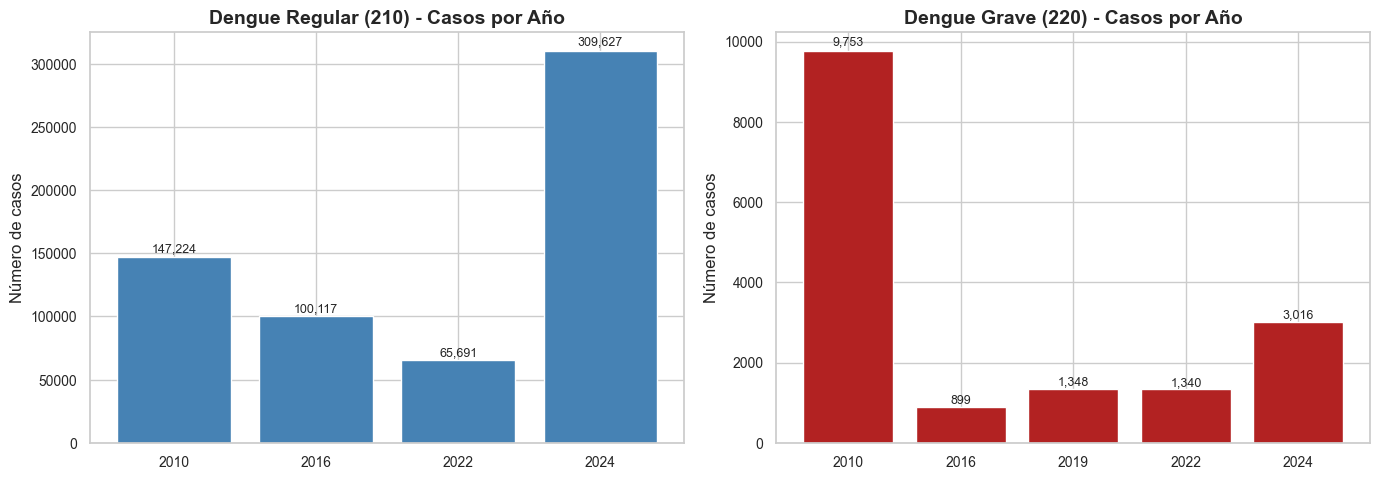

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Casos por año - Regular
conteo_reg = df_dengue['ANO'].value_counts().sort_index()
axes[0].bar(conteo_reg.index.astype(str), conteo_reg.values, color='steelblue', edgecolor='white')
axes[0].set_title('Dengue Regular (210) - Casos por Año', fontweight='bold')
axes[0].set_ylabel('Número de casos')
for i, v in enumerate(conteo_reg.values):
    axes[0].text(i, v + v*0.01, f'{v:,}', ha='center', va='bottom', fontsize=9)

# Casos por año - Grave
conteo_grav = df_grave['ANO'].value_counts().sort_index()
axes[1].bar(conteo_grav.index.astype(str), conteo_grav.values, color='firebrick', edgecolor='white')
axes[1].set_title('Dengue Grave (220) - Casos por Año', fontweight='bold')
axes[1].set_ylabel('Número de casos')
for i, v in enumerate(conteo_grav.values):
    axes[1].text(i, v + v*0.01, f'{v:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

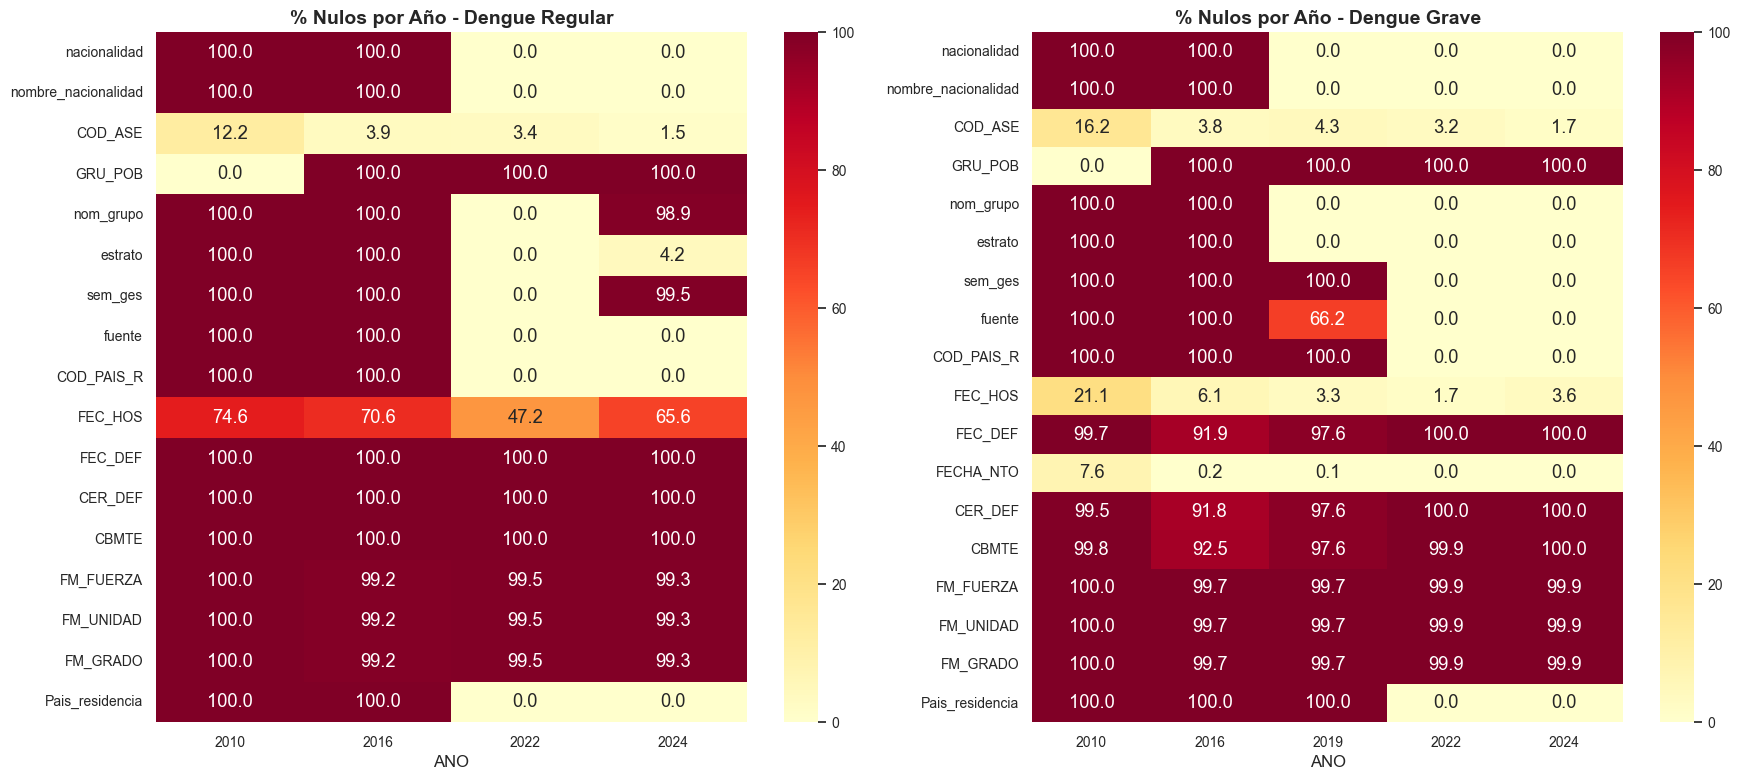

In [23]:
# Visualización de nulos como heatmap
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Solo columnas con al menos 1% de nulos
cols_nulos_reg = df_dengue.columns[df_dengue.isnull().mean() > 0.01]
if len(cols_nulos_reg) > 0:
    nulos_por_ano_reg = df_dengue.groupby('ANO')[cols_nulos_reg].apply(lambda x: x.isnull().mean() * 100)
    sns.heatmap(nulos_por_ano_reg.T, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[0])
    axes[0].set_title('% Nulos por Año - Dengue Regular', fontweight='bold')
else:
    axes[0].text(0.5, 0.5, 'Sin columnas con >1% nulos', ha='center', va='center')
    axes[0].set_title('Dengue Regular - Sin nulos significativos')

cols_nulos_grav = df_grave.columns[df_grave.isnull().mean() > 0.01]
if len(cols_nulos_grav) > 0:
    nulos_por_ano_grav = df_grave.groupby('ANO')[cols_nulos_grav].apply(lambda x: x.isnull().mean() * 100)
    sns.heatmap(nulos_por_ano_grav.T, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[1])
    axes[1].set_title('% Nulos por Año - Dengue Grave', fontweight='bold')
else:
    axes[1].text(0.5, 0.5, 'Sin columnas con >1% nulos', ha='center', va='center')
    axes[1].set_title('Dengue Grave - Sin nulos significativos')

plt.tight_layout()
plt.show()

## 8. Resumen de la carga y limpieza

### Hallazgos principales

In [24]:
print('='*60)
print('  RESUMEN DE CARGA Y LIMPIEZA')
print('='*60)

print(f'\nDengue Regular (código 210):')
print(f'  Registros totales: {len(df_dengue):,}')
print(f'  Años: {sorted(df_dengue["ANO"].unique())}')
print(f'  Columnas: {len(df_dengue.columns)}')
print(f'  Nota: No hay datos para 2019')

print(f'\nDengue Grave (código 220):')
print(f'  Registros totales: {len(df_grave):,}')
print(f'  Años: {sorted(df_grave["ANO"].unique())}')
print(f'  Columnas: {len(df_grave.columns)}')

print(f'\nDANE - Proyecciones de Población:')
print(f'  Municipios: {len(df_dane):,}')
print(f'  Departamentos: {df_dane["departamento"].nunique()}')
print(f'  Años de población: 2005-2020')
print(f'  Nota: Para 2022 y 2024 se usará la proyección de 2020 como aproximación')

print(f'\nDatos climáticos:')
print(f'  Pendiente de ejecución del notebook 00_descarga_clima_gee.ipynb')

  RESUMEN DE CARGA Y LIMPIEZA

Dengue Regular (código 210):
  Registros totales: 622,659
  Años: [np.int64(2010), np.int64(2016), np.int64(2022), np.int64(2024)]
  Columnas: 74
  Nota: No hay datos para 2019

Dengue Grave (código 220):
  Registros totales: 16,356
  Años: [np.int64(2010), np.int64(2016), np.int64(2019), np.int64(2022), np.int64(2024)]
  Columnas: 74

DANE - Proyecciones de Población:
  Municipios: 1,131
  Departamentos: 33
  Años de población: 2005-2020
  Nota: Para 2022 y 2024 se usará la proyección de 2020 como aproximación

Datos climáticos:
  Pendiente de ejecución del notebook 00_descarga_clima_gee.ipynb
